<div class="jumbotron">
  <h1 class="display-4">Análisis de los Discursos de Apertura de Sesiones Legislativas</h1>
      <p class="lead">Discursos del Período 2016 - 2019</p>
  <hr class="my-4">
      <p class="text-center">Tomamos los discursos de los períodos 2016 al 2019 para obtener las palabras más importantes en cada uno de los discursos y, además, comparar las palabras diferentes entre cada discurso.</p>
    
    <h2>
  El trabajo
  <small class="text-muted">Un análisis de discursos</small>
</h2>
<p>Siendo la Apertura de las Sesiones Legislativas uno evento político de importancia en la vida política del país, y siendo el 2019 un año electoral donde se define si continúa la alianza Cambiemos otro período presidencial al frente del Gobierno o, si accede la Presidencia alguno de los candidatos opositores, este discurso cobra especial relevancia para analizar lo que se vendrá el resto del 2019.</p>


<h3>
  Seguí nuestro trabajo en las redes sociales
  <small class="text-muted">Twitter y Medium</small>
</h3>

<ul class="nav nav-tabs">
  <li class="nav-item">
    <a class="nav-link active" href="https://twitter.com/ClusterIza"><img src="img/twitter.png" width="30" height="30" class="d-inline-block" alt=""></a>
  </li>
  <li class="nav-item">
    <a class="nav-link" href="https://medium.com/@clusterizadata"><img src="img/medium.png" width="30" height="30" class="d-inline-block" alt=""></a>
  </li>
</ul>
    
</div>

<div class="jumbotron">
<h2>
  El trabajo
  <small class="text-muted">Nuestro objetivo</small>
</h2>
<p>Realizar un análisis utilizando herramientas de data mining, extrayendo información de los distintos discursos de apertura de apertura de sesiones.</p>

</div>

In [1]:
# Librerias usadas
import pandas as pd
import os
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Cargo los discursos
INIT_PATH = os.getcwd() + '\\analisis-discurso-legislativo'


# MAC
#path_discursos = INIT_PATH + '/Datos/apertura'

# WINDOWS
path_discursos = INIT_PATH + '\\Datos\\apertura'

# MAC
#with open(path_discursos+'2016.txt', encoding='latin-1') as archivo:
#    cont2016 = archivo.read()
#with open(path_discursos+'2017.txt', encoding='latin-1')  as archivo:
#    cont2017 = archivo.read()
#with open(path_discursos+'2018.txt', encoding='latin-1')  as archivo:
#    cont2018 = archivo.read()
#with open(path_discursos+'2019.txt', encoding='latin-1')  as archivo:
#    cont2019 = archivo.read()

# WINDOWS
with open(path_discursos+'2016.txt') as archivo:
    cont2016 = archivo.read()
with open(path_discursos+'2017.txt')  as archivo:
    cont2017 = archivo.read()
with open(path_discursos+'2018.txt')  as archivo:
    cont2018 = archivo.read()
with open(path_discursos+'2019.txt')  as archivo:
    cont2019 = archivo.read()

In [5]:
#compruebo la carga de uno de los textos
#cont2016[250:1000]

In [6]:
# Cargamos los stopwords
#with open(INIT_PATH + '/Datos/stopwords_espaniol.txt', encoding='latin-1') as f:
#    stop_words = f.read().splitlines()

# WINDOWS
with open(INIT_PATH + '\\Datos\\stopwords_espaniol.txt', errors='ignore') as f:
    stop_words = f.read().splitlines()
    
# Cargo el tokenPatern para remover los numeros del texto
tokenPattern = r'(?u)\b[A-Za-z]+\b'

<div class="jumbotron">
<h1>
  ¿Qué dijo Macri en la reciente Apertura?
  <small class="text-muted">Lo más importante</small>
</h1>
<p>Aplicamos técnicas de Text Mining para quedarnos con el alma del discurso.</p>
</div>

In [7]:
#seleccionamos más stopwords después de visualizar todos los discursos
nube_stop_words=['años','está','estan','están','sólo','vez','le','les','son','ciento','además','día','año','hay','había',
                 "haber","han","habían","dice","decir","decía","hizo","nivel","hablar","hoy","tema","viene","sido","sea",
                 "tenía","luego","dijo","través","ningún","grande","parte","iba","Argentina","argentino","argentina","país"]

for pal in nube_stop_words:
    stop_words.append(pal)

In [8]:
# definimos los parametros de la nube
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

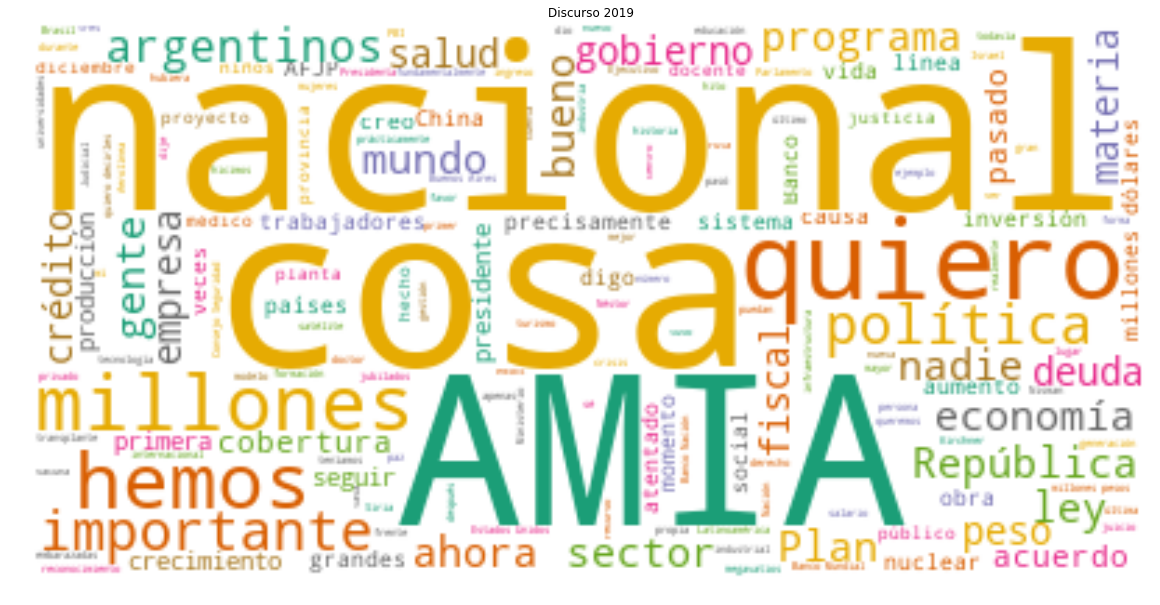

In [9]:
# Discurso 2019 limpio luego de aplicar nube_stop_words
plt.rcParams['figure.figsize'] = [20,12]
wc.generate(cont2019)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Discurso 2019")
plt.show()

<div class="jumbotron">
<h1>
  ¿Cómo varió el discurso a lo largo de su mandato?
  <small class="text-muted">Evolución del discurso</small>
</h1>
    <p>Mostramos las cuatro nubes de palabras correspondientes todos los años del mandato.</p>
    <p>Se pueden observar las diferencias y similitudes de cada apertura.</p>
</div>

In [10]:
# definimos los parametros de la nube
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

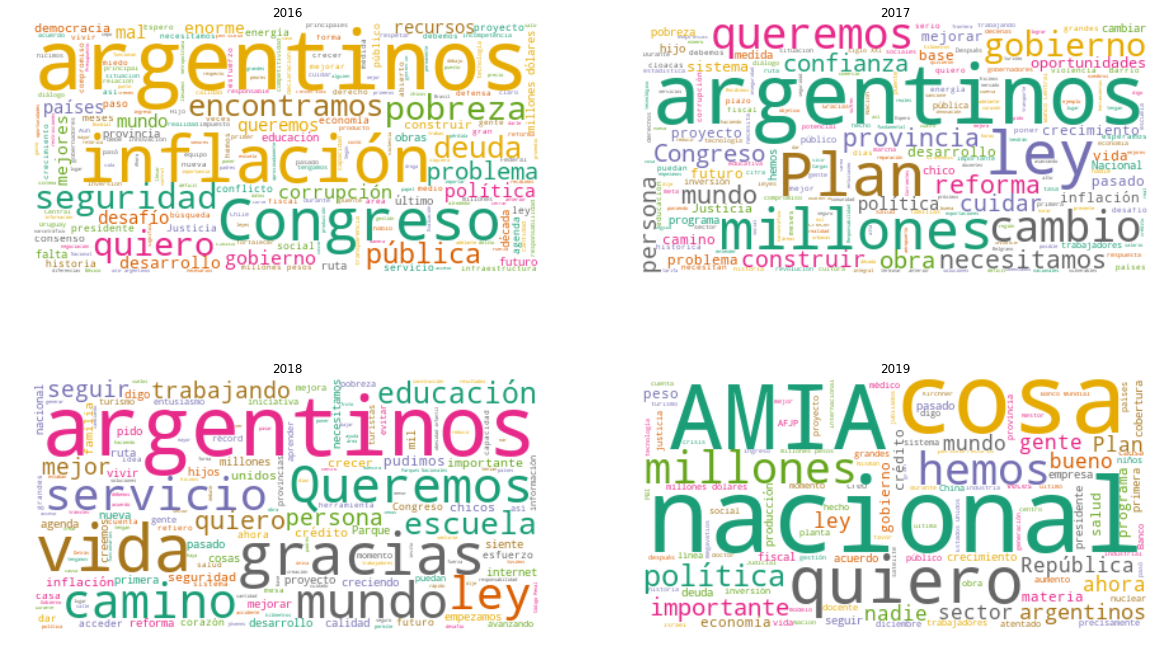

In [11]:
#plot de los cuatro discursos después de nube stop_words

plt.rcParams['figure.figsize'] = [20,12]

wc.generate(cont2016)
plt.subplot(2, 2, 1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(2016)

wc.generate(cont2017)
plt.subplot(2, 2, 2)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(2017)

wc.generate(cont2018)
plt.subplot(2, 2, 3)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(2018)

wc.generate(cont2019)
plt.subplot(2, 2, 4)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(2019)

plt.show()

In [13]:
#### TF - IDF
tfidf = TfidfVectorizer(stop_words=stop_words, token_pattern=tokenPattern)

response = tfidf.fit_transform([cont2016, cont2017, cont2018, cont2019])

feature_names = tfidf.get_feature_names()
lst = []
cols = ['palabra','frecuencia']
for col in response.nonzero()[1]:
    lst.append([feature_names[col],response[0, col]])
pdFrecuencias = pd.DataFrame(lst, columns=cols)

#separo y guardo los resultados TF-IDF
pd_TFIDF = pdFrecuencias.sort_values(by=['frecuencia'],ascending=[False])
pd_TFIDF = pd_TFIDF.drop_duplicates()
pd_TFIDF_not0 = pd_TFIDF[(pd_TFIDF.frecuencia != 0)]
pd_TFIDF_not0 = pd_TFIDF_not0.drop("frecuencia",axis=1)

pd_TFIDF.to_csv(INIT_PATH + '/Datos/TFIDF.csv',encoding='utf-8-sig', index=False, header=False)
pd_TFIDF_not0.to_csv(INIT_PATH + '/Datos/TFIDF_not_0.csv',encoding='utf-8-sig', index=False, header=False)


In [15]:
with open(INIT_PATH + '/Datos/TFIDF_not_0.csv', 'r', encoding='utf-8-sig') as f:
    TFIDF_stop_words = f.read().splitlines()

stop_words.extend(TFIDF_stop_words)

# definimos los parametros de la nube
wc = WordCloud(stopwords=stop_words, background_color="rgba(254, 254, 254, 0)", colormap="Dark2", 
               max_font_size=250, max_words=150, random_state=42)


<div class="jumbotron">
<h1>
  ¿A qué palabras se le otorgó mayor importancia en el 2019?
  <p><small class="text-muted">Comparación relativa con años anteriores</small></p>
</h1>
<p> Estas son las palabras que más se mencionaron este año en comparación con los discursos de años anteriores, es lo que diferencia el discurso 2019 de los anteriores. Esto nos permite deducir dónde esta el foco de la atención para el Gobierno en un año de elecciones presidenciales.</p>
</div>

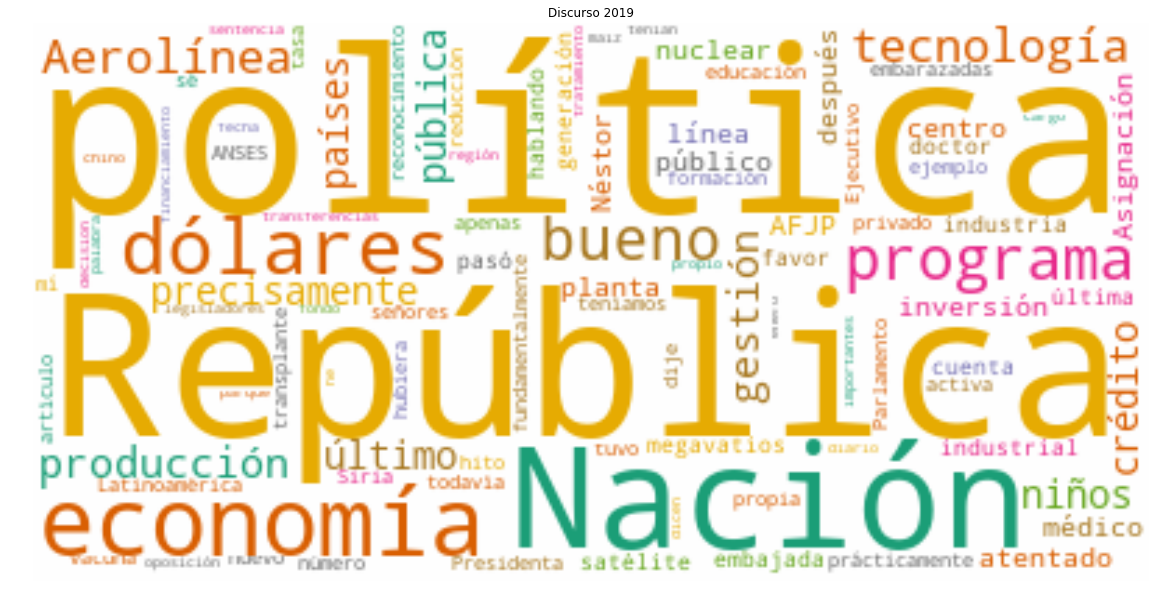

In [17]:
#Discurso 2019 limpio luego de aplicar Stop_Word + TFIDF_stop_words
wc.generate(cont2019)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Discurso 2019")
plt.show()

  <div class="card-footer text-muted">
    Hecho con <span style="color: #e25555;">&#9749;</span> por <a href="https://twitter.com/ClusterIza">@ClusterIza</a>
  </div>

In [ ]:
# futuros analisis